Run TFlite inference

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)


In [3]:
import numpy as np
import tflite_runtime.interpreter as tflite


interpreter = tflite.Interpreter("/home/lananh/GISLR/model.tflite")
found_signatures = list(interpreter.get_signature_list().keys())
prediction_fn = interpreter.get_signature_runner("serving_default")

# output = prediction_fn(inputs=demo_raw_data)
# sign = output["outputs"].argmax()

In [4]:
base_dir = '/home/lananh/GISLR'
pq_file = base_dir + '/train_landmark_files/16069/695046.parquet'
xyz_np = load_relevant_data_subset(pq_file)

In [5]:
prediction = prediction_fn(inputs=xyz_np)

In [6]:
prediction

{'outputs': array([7.8405987e-04, 4.2009930e-04, 1.2740440e-03, 1.1192166e-03,
        7.7755185e-04, 1.5926432e-03, 1.0056493e-03, 7.5985602e-04,
        7.5743021e-04, 1.0447165e-03, 1.2224251e-03, 7.4338925e-04,
        9.0380956e-04, 1.0246676e-03, 8.7490096e-04, 1.4449180e-03,
        7.3354598e-04, 4.8498996e-04, 5.1298016e-04, 1.1579744e-03,
        1.1747313e-03, 1.0798220e-03, 1.2223913e-03, 6.4649974e-04,
        9.0624386e-04, 4.7716181e-04, 3.9873685e-04, 9.8410971e-04,
        3.8649832e-04, 6.8810681e-04, 9.8016183e-04, 6.8695645e-04,
        1.4035163e-03, 1.0161300e-03, 1.1440209e-03, 1.0555817e-03,
        1.0433285e-03, 1.0838889e-03, 7.9122698e-04, 6.5401598e-04,
        1.0613875e-03, 1.1145662e-03, 6.0950476e-04, 1.3109529e-03,
        9.7460224e-04, 1.0596140e-03, 8.7310397e-04, 1.4868253e-03,
        4.4101558e-04, 9.2833716e-04, 1.0537561e-03, 1.1160031e-03,
        1.8646016e-03, 1.1355615e-03, 7.1001262e-04, 9.1998943e-04,
        1.5164886e-03, 1.3971422e-03,

In [7]:
prediction['outputs'].shape


(250,)

<Axes: >

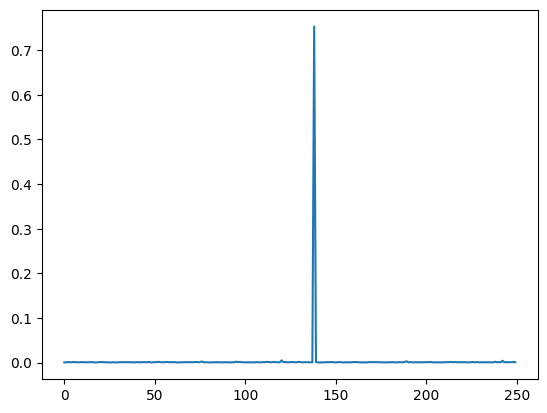

In [8]:
pd.Series(prediction['outputs']).plot()

<Axes: >

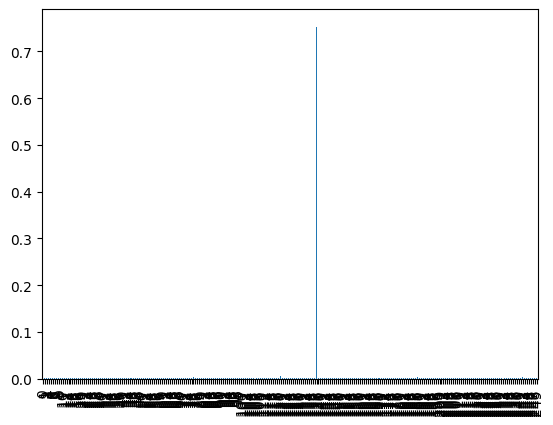

In [9]:
pd.Series(prediction['outputs']).plot(kind='bar')

In [10]:
pd.Series(prediction['outputs']).argmax()

138

In [11]:
pd.Series(prediction['outputs'])

0      0.000784
1      0.000420
2      0.001274
3      0.001119
4      0.000778
         ...   
245    0.000844
246    0.001021
247    0.001076
248    0.001395
249    0.000997
Length: 250, dtype: float32

In [12]:
train = pd.read_csv('/home/lananh/GISLR/train.csv')
train['sign_ord'] = train['sign'].astype('category').cat.codes

# Dictionaries to translate sign <-> ordinal encoded sign
SIGN2ORD = train[['sign', 'sign_ord']].set_index('sign').squeeze().to_dict()
ORD2SIGN = train[['sign_ord', 'sign']].set_index('sign_ord').squeeze().to_dict()

base_dir = '/home/lananh/GISLR'
pq_file = base_dir + '/train_landmark_files/16069/695046.parquet'
xyz_np = load_relevant_data_subset(pq_file)
prediction = prediction_fn(inputs=xyz_np)
prediction['outputs'].shape
pd.Series(prediction['outputs']).argmax()



138

In [13]:
train

,path,participant_id,sequence_id,sign,sign_ord
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow,25
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait,232
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud,48
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird,23
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie,164
...,...,...,...,...,...
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white,238
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have,108
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower,86
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room,188


In [14]:
train['sign_ord']

0         25
1        232
2         48
3         23
4        164
        ... 
94472    238
94473    108
94474     86
94475    188
94476    105
Name: sign_ord, Length: 94477, dtype: int16

In [15]:
ORD2SIGN

{25: 'blow',
 232: 'wait',
 48: 'cloud',
 23: 'bird',
 164: 'owie',
 67: 'duck',
 143: 'minemy',
 134: 'lips',
 86: 'flower',
 220: 'time',
 231: 'vacuum',
 8: 'apple',
 180: 'puzzle',
 144: 'mitten',
 216: 'there',
 65: 'dry',
 195: 'shirt',
 165: 'owl',
 243: 'yellow',
 156: 'not',
 249: 'zipper',
 45: 'clean',
 47: 'closet',
 181: 'quiet',
 108: 'have',
 30: 'brother',
 49: 'clown',
 41: 'cheek',
 54: 'cute',
 207: 'store',
 196: 'shoe',
 235: 'wet',
 193: 'see',
 70: 'empty',
 74: 'fall',
 14: 'balloon',
 89: 'frenchfries',
 80: 'finger',
 190: 'same',
 52: 'cry',
 121: 'hungry',
 162: 'orange',
 142: 'milk',
 97: 'go',
 62: 'drawer',
 0: 'TV',
 6: 'another',
 93: 'giraffe',
 233: 'wake',
 19: 'bee',
 13: 'bad',
 35: 'can',
 191: 'say',
 34: 'callonphone',
 81: 'finish',
 159: 'old',
 12: 'backyard',
 198: 'sick',
 136: 'look',
 215: 'that',
 24: 'black',
 246: 'yourself',
 161: 'open',
 4: 'alligator',
 146: 'moon',
 78: 'find',
 172: 'pizza',
 194: 'shhh',
 76: 'fast',
 125: 'jac

In [16]:
ORD2SIGN[pd.Series(prediction['outputs']).argmax()]

'mad'

In [17]:
train.query('sequence_id == 695046')

,path,participant_id,sequence_id,sign,sign_ord
87142,train_landmark_files/16069/695046.parquet,16069,695046,mad,138


<function matplotlib.pyplot.show(close=None, block=None)>

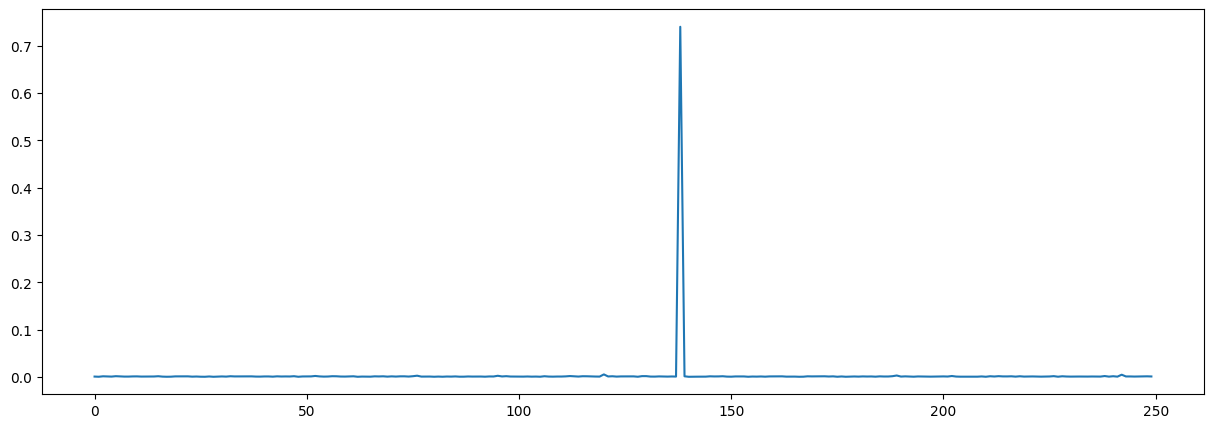

In [18]:
pd.Series(prediction['outputs']).plot(figsize=(15,5))
plt.show

Show an Example prediction for *word* like "nap"

In [19]:
train['sign'].value_counts()

sign
listen    415
look      414
shhh      411
donkey    410
mouse     408
         ... 
dance     312
person    312
beside    310
vacuum    307
zipper    299
Name: count, Length: 250, dtype: int64

In [21]:
train['sign'].value_counts().head(10)

sign
listen     415
look       414
shhh       411
donkey     410
mouse      408
duck       405
hear       405
uncle      405
pretend    404
bird       404
Name: count, dtype: int64